## Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [18]:
data = pd.read_csv('Data/internet_service_churn.csv')

In [19]:
data.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [20]:
data.shape

(72274, 11)

In [21]:
data.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [22]:
data.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [23]:
data.drop(columns=['id'], inplace=True)

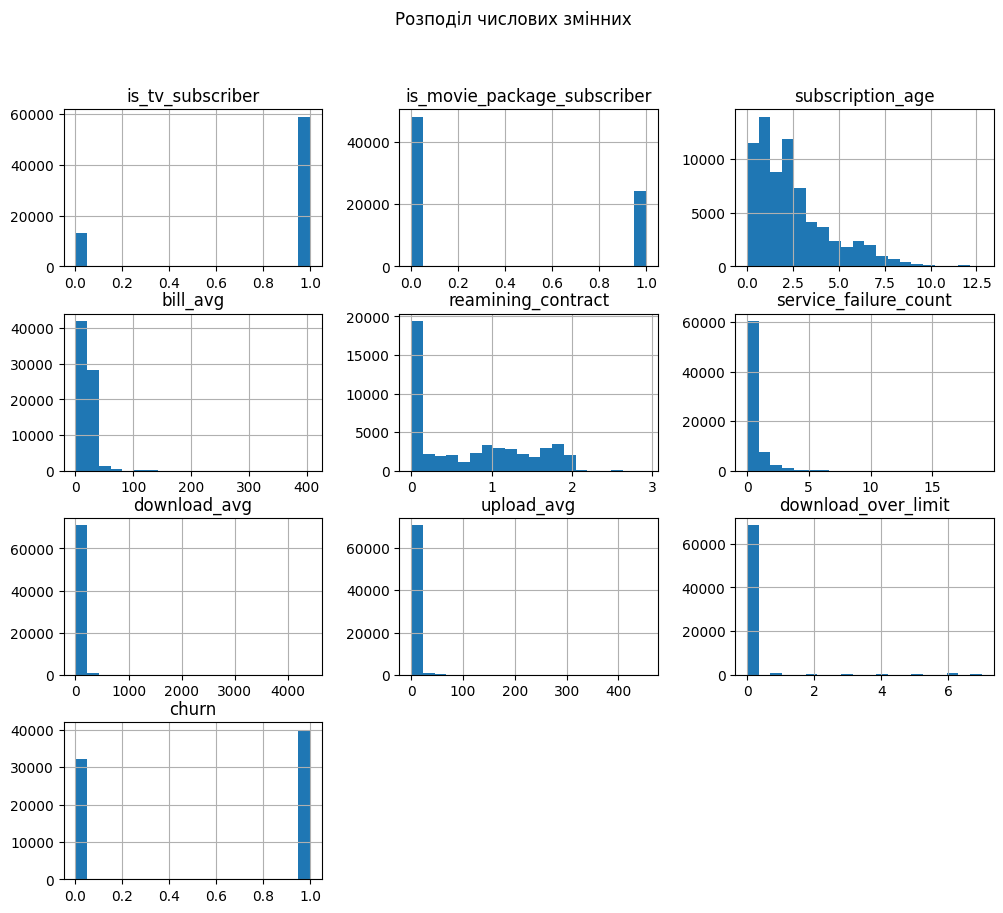

In [24]:
data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Розподіл числових змінних')
plt.show()

<Axes: >

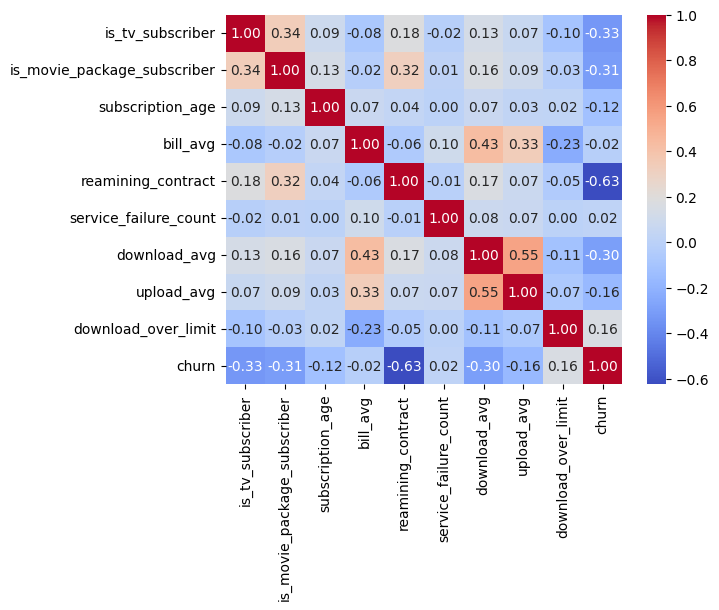

In [25]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

## Preliminary Data Processing

In [26]:
data.isnull().sum() / data.shape[0]

is_tv_subscriber               0.000000
is_movie_package_subscriber    0.000000
subscription_age               0.000000
bill_avg                       0.000000
reamining_contract             0.298475
service_failure_count          0.000000
download_avg                   0.005272
upload_avg                     0.005272
download_over_limit            0.000000
churn                          0.000000
dtype: float64

In [27]:
data.drop('reamining_contract', axis=1, inplace=True)

In [28]:
data.isnull().sum() / data.shape[0]

is_tv_subscriber               0.000000
is_movie_package_subscriber    0.000000
subscription_age               0.000000
bill_avg                       0.000000
service_failure_count          0.000000
download_avg                   0.005272
upload_avg                     0.005272
download_over_limit            0.000000
churn                          0.000000
dtype: float64

In [29]:
data['upload_avg'] = data['upload_avg'].fillna(data['upload_avg'].mean())
data['download_avg'] = data['download_avg'].fillna(data['download_avg'].mean())

In [30]:
data.isnull().sum() / data.shape[0]

is_tv_subscriber               0.0
is_movie_package_subscriber    0.0
subscription_age               0.0
bill_avg                       0.0
service_failure_count          0.0
download_avg                   0.0
upload_avg                     0.0
download_over_limit            0.0
churn                          0.0
dtype: float64

In [31]:
data.drop_duplicates()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0,8.4,2.3,0,0
1,0,0,8.22,0,0,0.0,0.0,0,1
2,1,0,8.91,16,0,13.7,0.9,0,1
3,0,0,6.87,21,1,0.0,0.0,0,1
4,0,0,6.39,0,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
72267,0,0,0.08,0,0,84.2,5.0,0,1
72268,1,0,0.04,11,0,0.0,0.0,0,1
72269,1,1,0.09,0,0,0.0,0.0,0,1
72270,1,0,0.06,1,0,0.8,0.0,0,1


In [34]:
data.to_csv('Data/ready_churm.csv', index=False)